<a href="https://colab.research.google.com/github/Ameesha2214/Unified_mentor_coffee_sales_project/blob/main/Coffee_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("index.csv")
df.head

<bound method NDFrame.head of             date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
1128  2024-07-31  2024-07-31 20:53:35.077      card  ANON-0000-0000-0443   
1129  2024-07-31  2024-07-31 20:59:25.013      card  ANON-0000-0000-0040   
1130  2024-07-31  2024-07-31 21:26:26.000      card  ANON-0000-0000-0444   
1131  2024-07-31  2024-07-31 21:54:11.824      card  ANON-0000-0000-0445   
1132  2024-07-31  2024-07-31 21:55:16.570      card  ANON-0000-0000-0446   

      money          coffee_name  
0     38.70                Latte  
1     38.70        Hot Chocolate  
2     38.70        Hot Chocolate  
3     28.90            Americano  
4     38.70                Latte  
...     ...                  ...  
1128  23.02              Cortado  
1129  27.92  Americano with Milk  
1130  32.82                Latte  
1131  32.82                Latte  
1132  32.82                Latte  

[1133 rows x 6 columns]>

In [21]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [23]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [25]:

df['card'].fillna('default_value', inplace=True)

<ipython-input-25-e676d49adad9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna('default_value', inplace=True)


In [26]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [27]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [28]:
df.dtypes

,0
date,datetime64[ns]
datetime,datetime64[ns]
cash_type,object
card,object
money,float64
coffee_name,object


In [29]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [30]:
from scipy import stats

df['z_score'] = stats.zscore(df['money'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
# Remove outliers from the dataset
df = df[(df['z_score'] <= 3) & (df['z_score'] >= -3)]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   z_score      1133 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 62.1+ KB


In [32]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   z_score      1133 non-null   float64       
 7   year         1133 non-null   int32         
 8   month        1133 non-null   int32         
 9   day          1133 non-null   int32         
 10  day_of_week  1133 non-null   int32         
dtypes: datetime64[ns](2), float64(2), int32(4), object(3)
memory usage: 79.8+ KB


In [33]:
df = pd.get_dummies(df, columns=['coffee_name'])

In [34]:
df['log_money'] = np.log1p(df['money'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             1133 non-null   datetime64[ns]
 1   datetime                         1133 non-null   datetime64[ns]
 2   cash_type                        1133 non-null   object        
 3   card                             1133 non-null   object        
 4   money                            1133 non-null   float64       
 5   z_score                          1133 non-null   float64       
 6   year                             1133 non-null   int32         
 7   month                            1133 non-null   int32         
 8   day                              1133 non-null   int32         
 9   day_of_week                      1133 non-null   int32         
 10  coffee_name_Americano            1133 non-null   bool       

In [36]:
customer_df = df.groupby('card').agg({
    'money': ['sum', 'mean', 'count'],
    'datetime': ['min', 'max']
})

# Add a 'favorite_coffee' column based on the most frequently purchased coffee type
coffee_columns = [col for col in df.columns if col.startswith('coffee_name_')]
customer_df['favorite_coffee'] = df[coffee_columns].idxmax(axis=1).apply(lambda x: x.replace('coffee_name_', '')).groupby(df['card']).agg(lambda x: x.mode()[0])

# Rename the columns for better readability
customer_df.columns = ['total_spent', 'avg_spent', 'purchase_count', 'first_purchase', 'last_purchase', 'favorite_coffee']

# Reset index for better usability
customer_df = customer_df.reset_index()

print(customer_df.head())


                  card  total_spent  avg_spent  purchase_count  \
0  ANON-0000-0000-0001       646.14  38.008235              17   
1  ANON-0000-0000-0002        77.40  38.700000               2   
2  ANON-0000-0000-0003       651.96  28.346087              23   
3  ANON-0000-0000-0004       289.50  32.166667               9   
4  ANON-0000-0000-0005        33.80  33.800000               1   

           first_purchase           last_purchase      favorite_coffee  
0 2024-03-01 10:15:50.520 2024-06-06 10:36:09.667                Latte  
1 2024-03-01 12:19:22.539 2024-03-01 12:20:18.089        Hot Chocolate  
2 2024-03-01 13:46:33.006 2024-07-29 09:19:44.082            Americano  
3 2024-03-01 13:48:14.626 2024-04-15 17:02:49.748            Americano  
4 2024-03-01 15:39:47.726 2024-03-01 15:39:47.726  Americano with Milk  


In [37]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   card             447 non-null    object        
 1   total_spent      447 non-null    float64       
 2   avg_spent        447 non-null    float64       
 3   purchase_count   447 non-null    int64         
 4   first_purchase   447 non-null    datetime64[ns]
 5   last_purchase    447 non-null    datetime64[ns]
 6   favorite_coffee  447 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 24.6+ KB


In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
customer_df['cluster'] = kmeans.fit_predict(customer_df[['total_spent', 'avg_spent', 'purchase_count']])

In [39]:
from datetime import datetime
df['recency'] = (datetime.now() - df['datetime']).dt.days
df['frequency'] = df.groupby('card')['datetime'].transform('count')
df['monetary'] = df.groupby('card')['money'].transform('sum')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             1133 non-null   datetime64[ns]
 1   datetime                         1133 non-null   datetime64[ns]
 2   cash_type                        1133 non-null   object        
 3   card                             1133 non-null   object        
 4   money                            1133 non-null   float64       
 5   z_score                          1133 non-null   float64       
 6   year                             1133 non-null   int32         
 7   month                            1133 non-null   int32         
 8   day                              1133 non-null   int32         
 9   day_of_week                      1133 non-null   int32         
 10  coffee_name_Americano            1133 non-null   bool       

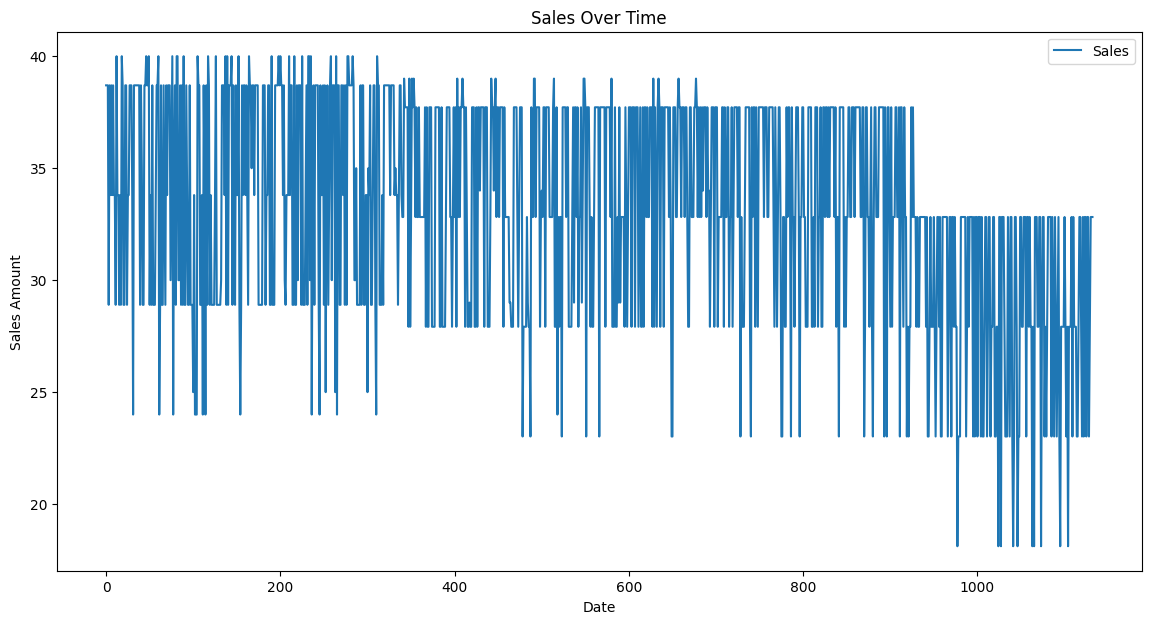

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['money'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

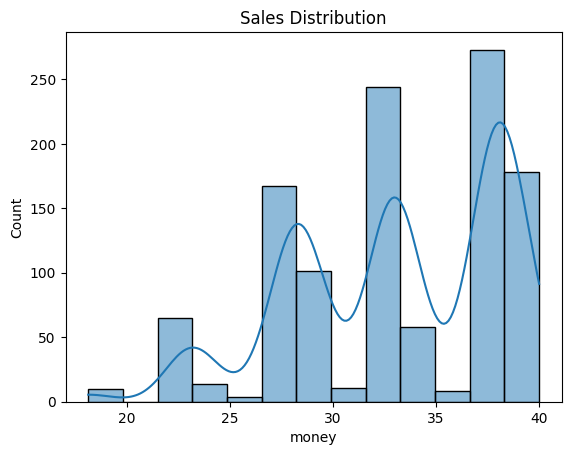

In [42]:
import seaborn as sns

sns.histplot(df['money'], kde=True)
plt.title('Sales Distribution')
plt.show()

In [43]:
top_customers = df.groupby('card')['money'].sum().sort_values(ascending=False)
print(top_customers.head(10))

card
default_value          3186.00
ANON-0000-0000-0012    2593.18
ANON-0000-0000-0009    2212.70
ANON-0000-0000-0097     882.22
ANON-0000-0000-0040     706.36
ANON-0000-0000-0003     651.96
ANON-0000-0000-0001     646.14
ANON-0000-0000-0141     474.64
ANON-0000-0000-0180     442.84
ANON-0000-0000-0024     422.26
Name: money, dtype: float64


In [47]:
combined_df = pd.concat([df.reset_index(), customer_df.reset_index()], axis=1)

# Save to CSV
combined_df.to_csv('combined_data.csv', index=False)

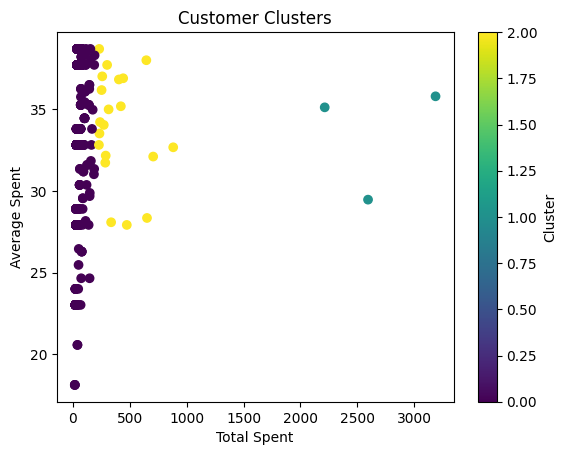

In [48]:
plt.scatter(customer_df['total_spent'], customer_df['avg_spent'], c=customer_df['cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Average Spent')
plt.colorbar(label='Cluster')
plt.show()


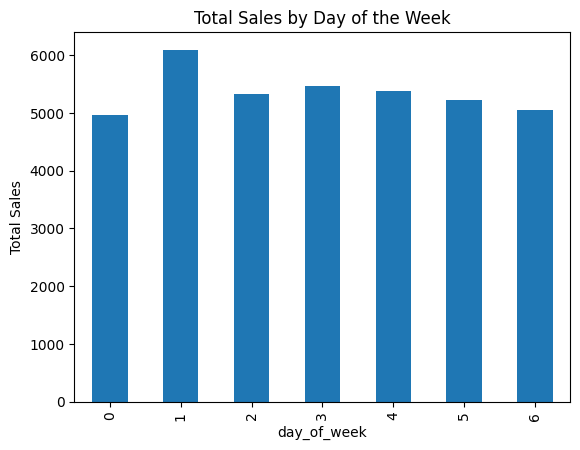

In [49]:
df.groupby('day_of_week')['money'].sum().plot(kind='bar', title='Total Sales by Day of the Week')
plt.ylabel('Total Sales')
plt.show()


In [50]:
df['R_Score'] = pd.qcut(df['recency'], 4, labels=[4, 3, 2, 1])
df['F_Score'] = pd.qcut(df['frequency'], 4, labels=[1, 2, 3, 4])
df['M_Score'] = pd.qcut(df['monetary'], 4, labels=[1, 2, 3, 4])
df['RFM_Segment'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)


In [54]:
time_data = df.groupby('date')['money'].sum().reset_index()
time_data.columns = ['ds', 'y']


In [55]:
from prophet import Prophet  # Make sure to install fbprophet (or prophet for newer versions)
model = Prophet()
model.fit(time_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfyfpklj4/8qy99rii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfyfpklj4/8od6w3sa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68545', 'data', 'file=/tmp/tmpfyfpklj4/8qy99rii.json', 'init=/tmp/tmpfyfpklj4/8od6w3sa.json', 'output', 'file=/tmp/tmpfyfpklj4/prophet_modelascil6bg/prophet_model-20241203170246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:02:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:02:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
future = model.make_future_dataframe(periods=30)  # Forecast 30 days into the future


In [57]:
forecast = model.predict(future)


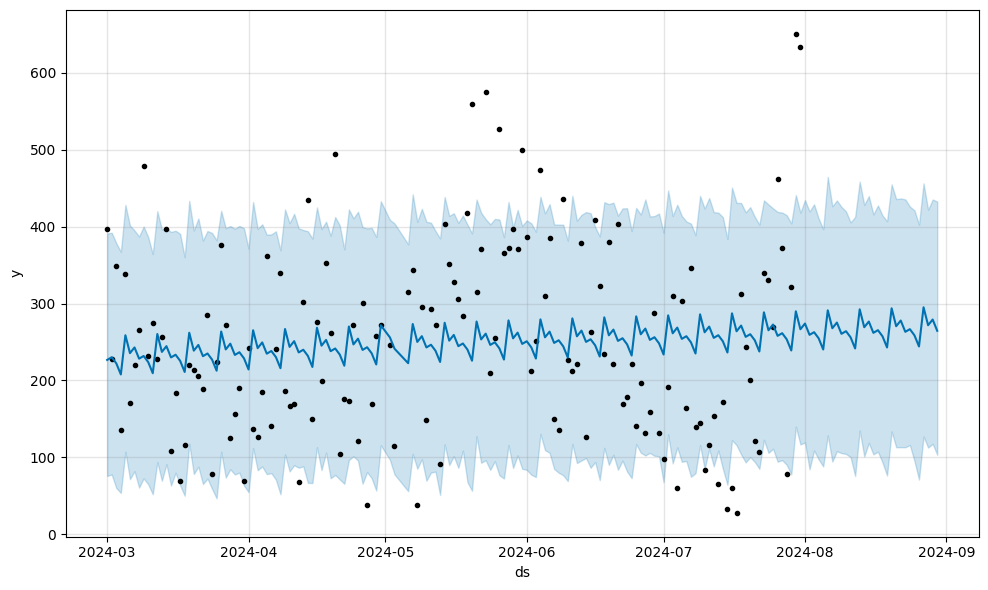

In [58]:
model.plot(forecast)
plt.show()

In [59]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds        yhat  yhat_lower  yhat_upper
175 2024-08-26  244.162933   71.080048  402.646764
176 2024-08-27  295.107980  127.075635  456.182638
177 2024-08-28  271.771502  112.683635  421.919508
178 2024-08-29  279.177963  117.528848  435.191764
179 2024-08-30  264.505193  103.283927  432.614635


In [60]:
# Define a cutoff date for training
cutoff_date = '2024-11-01'
train_data = time_data[time_data['ds'] < cutoff_date]
test_data = time_data[time_data['ds'] >= cutoff_date]

# Train the model
model = Prophet()
model.fit(train_data)

# Predict on future dates (including the test period)
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfyfpklj4/3mvg4pgz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfyfpklj4/wsyohn54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68856', 'data', 'file=/tmp/tmpfyfpklj4/3mvg4pgz.json', 'init=/tmp/tmpfyfpklj4/wsyohn54.json', 'output', 'file=/tmp/tmpfyfpklj4/prophet_model4ugma6xy/prophet_model-20241203170431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:04:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [62]:
# Define a cutoff date for training that exists within your data
# For example, find the date 30 days before the last date in your dataset:
cutoff_date = time_data['ds'].max() - pd.DateOffset(days=30)

# Split the data
train_data = time_data[time_data['ds'] < cutoff_date]
test_data = time_data[time_data['ds'] >= cutoff_date]

# Train the model
model = Prophet()
model.fit(train_data)

# Predict on future dates (including the test period)
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Align the test set with predictions
test_forecast = forecast[forecast['ds'].isin(test_data['ds'])]

# Calculate MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfyfpklj4/8lq76lk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfyfpklj4/yimjb5ps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77550', 'data', 'file=/tmp/tmpfyfpklj4/8lq76lk4.json', 'init=/tmp/tmpfyfpklj4/yimjb5ps.json', 'output', 'file=/tmp/tmpfyfpklj4/prophet_modelj0dwxspf/prophet_model-20241203170516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 146.13171197104876


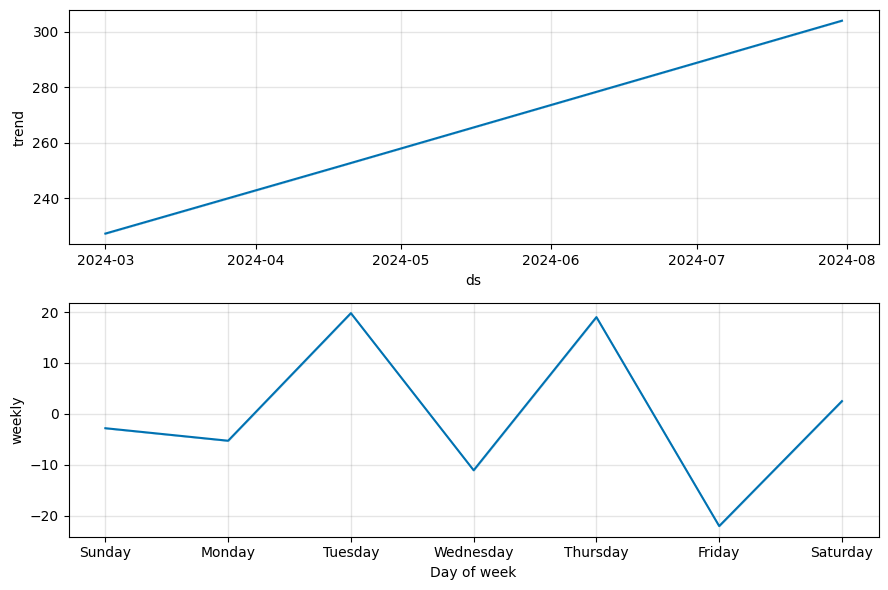

In [64]:
model.plot_components(forecast)
plt.show()
